<a href="https://colab.research.google.com/github/KishorAlagappan/TakeHome-CaseStudy-2-Datasets/blob/main/TakeHome_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#importing libraries
import pandas as pd 
import numpy as np

In [29]:
#Reading the dataset_1 (csv file)
df1 = pd.read_csv('/content/takehome_users.csv',encoding='ISO-8859-1')

In [ ]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [31]:
#Reading the dataset_2 (csv file)
df2 = pd.read_csv('/content/takehome_user_engagement.csv',encoding='ISO-8859-1')

In [32]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [37]:
#To deal with date/time values
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

def get_week(x): return x.isocalendar()

def get_iso_date_int(df,column):
    temp_df=pd.DataFrame(df[column].tolist(), index=df.index)
    year,week,day=temp_df[0],temp_df[1],temp_df[2]
    return year,week,day


In [39]:
df1 = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')

#code creation_time,last_session_time as date/time
df1.creation_time = pd.to_datetime(df1['creation_time'])
df1.last_session_creation_time = pd.to_datetime(df1['last_session_creation_time'])

#change column heading
df1['user_id'] = df1['object_id']

#drop original column
df1.drop('object_id', axis=1, inplace=True)

#drop private information
df1.drop(['name', 'email'], axis=1, inplace=True)

df1.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id
0,2014-04-22 03:53:30,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,1
1,2013-11-15 03:45:04,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,2
2,2013-03-19 23:14:52,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,3
3,2013-05-21 08:09:28,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,4
4,2013-01-17 10:14:20,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,5


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   creation_source             12000 non-null  object        
 2   last_session_creation_time  8823 non-null   datetime64[ns]
 3   opted_in_to_mailing_list    12000 non-null  int64         
 4   enabled_for_marketing_drip  12000 non-null  int64         
 5   org_id                      12000 non-null  int64         
 6   invited_by_user_id          6417 non-null   float64       
 7   user_id                     12000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 750.1+ KB


In [41]:
#make user engagement time_stamp into date/time
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'])

#Make a weekly unit for time stamp
df2['week_time_stamp']=df2['time_stamp'].apply(get_week)

#This is useful to know so we know where the start and finish of the trial exists
print('First user engagement timestamp:',min(df2.time_stamp))
print('Last user engagement timestamp:',max(df2.time_stamp))

First user engagement timestamp: 2012-05-31 08:20:06
Last user engagement timestamp: 2014-06-06 14:58:50


In [42]:
#Create Year,Month,Week,and Day units. To be fair I would be doing this regardless of use,
# since I know I will be working with time its useful to have options for working with the data
year, month, day=get_date_int(df2, 'time_stamp')
df2['year'],df2['month'],df2['day']=year,month,day
df2['week']=df2['time_stamp'].dt.week

#Make year and week, So if we are dealing with 52 week units then I want year to make it individual unit of time
iso_year,iso_week,iso_day=get_iso_date_int(df2,'week_time_stamp')
df2['year_week']=list(zip(iso_year,iso_week))


<ipython-input-42-a4f65c98f379>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week']=df2['time_stamp'].dt.week


In [43]:
df2=df2.sort_values(['time_stamp','user_id'],ascending=True)
df2=df2[['user_id','visited','day','year_week']]

Label

In [44]:
# Label dictionary
adopted_user_dict={}

#number of year/week units
weeks=df2.year_week

#individual user ids
user_ids=list(set(df2['user_id']))

#loop over user ids
for i in range(len(user_ids)):
    user_id=user_ids[i]
    #dataframe for specific user that has duplicate records by week
    reduced_df=df2[(df2['user_id']==user_id)&(weeks.isin(weeks[weeks.duplicated()]))]
    #count the number of duplicate 'day' records of weeks if greater than 2 keep
    week_counts=reduced_df.year_week.value_counts()[reduced_df.year_week.value_counts()>2]
    three_logins=reduced_df[reduced_df.year_week.isin(list(week_counts.index))]
    #remove duplicates of 3 day events within week
    three_logins=three_logins[~three_logins.duplicated()]
    #code user id and number of 3 day events
    adopted_user_dict[str(user_id)]=len(three_logins)

#apply the label dictionary to user ids coded to the column (engagement_index)
df2['engagement_index']=df2['user_id'].apply(lambda x: adopted_user_dict[str(x)])

#Code engagement_index as boolean values, which will be the adopted_user records
df2['adopted_user']=0
df2['adopted_user'][df2['engagement_index']>0]=1

adopted_count=df2[['user_id','adopted_user']][df2['adopted_user']==1].groupby('user_id').count()
print('Number of adopted users:',len(adopted_count))

Number of adopted users: 1445


<ipython-input-44-3141af508cef>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['adopted_user'][df2['engagement_index']>0]=1


Merge

In [45]:
#Narrow down the dataset for merging
adopted=df2[['user_id','adopted_user']]
#Merge the adopted user info to users dataframe
adopted_users = pd.merge(df1, adopted, on='user_id', how='outer')

creation_year, creation_month, creation_day=get_date_int(adopted_users, 'creation_time')
last_session_year, last_session_month, last_session_day=get_date_int(adopted_users, 'last_session_creation_time')
adopted_users['creation_year'],adopted_users['creation_month'],adopted_users['creation_day']=creation_year, creation_month, creation_day
adopted_users['last_session_year'],adopted_users['last_session_month'],adopted_users['last_session_day']=last_session_year, last_session_month, last_session_day
adopted_users.drop(['creation_time', 'last_session_creation_time', 'user_id'], axis=1, inplace=True)


In [46]:
adopted_users.last_session_day.fillna(0, inplace=True)
adopted_users.last_session_month.fillna(0, inplace=True)
adopted_users.last_session_year.fillna(0, inplace=True)

Model

In [47]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
adopted_users['creation_source']=le.fit_transform(adopted_users['creation_source'])

In [48]:
adopted_users['invited'] = np.where(adopted_users['invited_by_user_id'].isnull(), 1, 0)
adopted_users.drop('invited_by_user_id', axis=1, inplace=True)
#Fill in the missings
adopted_users=adopted_users.fillna(0)
#Create column labels for output
col_names=list(pd.Series(adopted_users.columns)[pd.Series(adopted_users.columns)!='adopted_user'])
#Code as arrays
X=adopted_users[list(pd.Series(adopted_users.columns)[pd.Series(adopted_users.columns)!='adopted_user'])].values
y=adopted_users['adopted_user'].values


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=3)
print('Train size:',(len(X_train)/len(X))*100)
print('Train observations:',(len(X_train)))
print('Test size:',(len(X_test)/len(X))*100)
print('Test observations:',(len(X_test)))


Train size: 69.99962102191441
Train observations: 147765
Test size: 30.00037897808559
Test observations: 63329


MATPLOTLIB

In [50]:
import matplotlib.pyplot as plt


Accuracy: 0.9999255574730146 

Feature ranking:


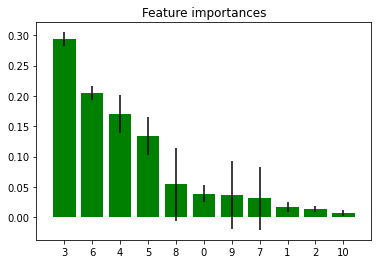

,features,importance
3,org_id,0.293394
6,creation_day,0.204772
4,creation_year,0.170147
5,creation_month,0.133685
8,last_session_month,0.054419
0,creation_source,0.038687
9,last_session_day,0.036800
7,last_session_year,0.030895
1,opted_in_to_mailing_list,0.016536
2,enabled_for_marketing_drip,0.013290


In [51]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20,random_state=0,criterion='gini', class_weight='balanced')

clf.fit(X_train, y_train.ravel())
Accuracy=clf.score(X_train, y_train.ravel())
print('Accuracy:',Accuracy,'\n')

importFeature = clf.feature_importances_
feature_importances=pd.DataFrame([importFeature])

std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importFeature)[::-1]

# Print the feature ranking
print("Feature ranking:")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importFeature[indices],color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

feature_importances=pd.DataFrame(pd.Series(col_names)[indices])
feature_importances['importance']=np.sort(importFeature)[::-1]
feature_importances.columns=['features','importance']
feature_importances